<a href="https://colab.research.google.com/github/HariPrasathHari/Tuberculosis_dataset/blob/master/Copy_of_TB_project_test_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !wget http://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip
# !unzip ChinaSet_AllFiles.zip
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
import numpy as np
import numpy
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
  
import matplotlib.pyplot as plt
%matplotlib inline

  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
fastai 1.0.41 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.
  Found existing installation: Pillow 4.1.1
    Uninstalling Pillow-4.1.1:
      Successfully uninstalled Pillow-4.1.1
  [PIL]
You must restart the runtime in order to use newly installed versions.
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
fastai 1.0.41 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
batch_size = 20
transform =  transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
]
)
dataset =  datasets.ImageFolder("gdrive/My Drive/tb",transform)
dataloader = torch.utils.data.DataLoader(dataset,batch_size = 8 ,shuffle = True)

In [5]:
print(dataset)
print(len(dataloader))

Dataset ImageFolder
    Number of datapoints: 662
    Root Location: gdrive/My Drive/tb
    Transforms (if any): Compose(
                             Resize(size=255, interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             ToTensor()
                             Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                         )
    Target Transforms (if any): None
83


In [0]:
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [7]:
!pip install Pillow==4.1.1

  Using cached https://files.pythonhosted.org/packages/36/e5/88b3d60924a3f8476fa74ec086f5fbaba56dd6cee0d82845f883b6b6dd18/Pillow-4.1.1-cp36-cp36m-manylinux1_x86_64.whl
fastai 1.0.41 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1
  [PIL]
You must restart the runtime in order to use newly installed versions.


In [0]:
data_iter = iter(dataloader)
images, labels = next(data_iter)

In [0]:
def helper_imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)
    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    return ax

def imshow(img):
    img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0))) 

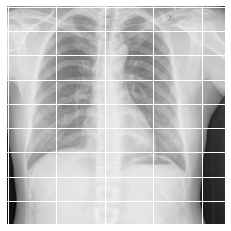

In [10]:
helper_imshow(images[0],normalize = True)

In [0]:
num_train = len(dataloader)
num_train = 662
valid_size =0.2
num_workers =4 
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

classes = ['postive','normal']

In [12]:
print(len(train_loader))
print(len(valid_loader))

27
7


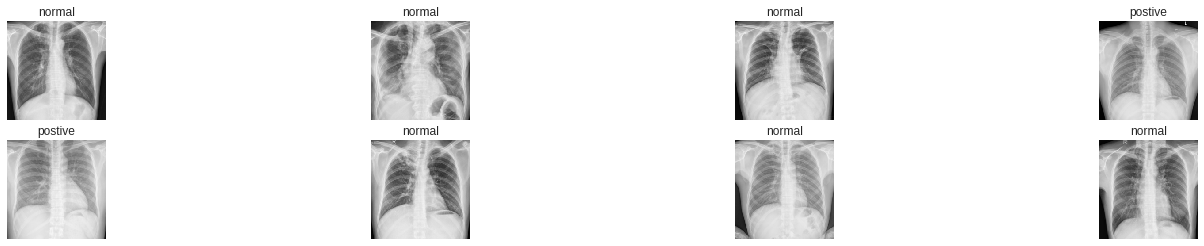

In [13]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() 

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(8):
    ax = fig.add_subplot(2, 8/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [14]:
import torch.nn as nn
import torch.nn.functional as F
train_on_gpu =True

def init_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m,nn.Linear):
        torch.nn.init.normal_(m.weight,0,0.5)
        if m.bias is not None:
            torch.nn.init.normal_(m.bias)
    

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5, padding=2 ,stride=2)
        self.conv2 = nn.Conv2d(32, 32, 5, padding=2 ,stride=2)
        self.conv3 = nn.Conv2d(32, 32, 5, padding=2 ,stride=1)
        self.conv4 = nn.Conv2d(32, 64, 5, padding=2 ,stride=2)
        self.conv5 = nn.Conv2d(64, 64, 5, padding=2 ,stride=1)
        self.conv6 = nn.Conv2d(64, 64, 5, padding=2 ,stride=2)
        self.conv7 = nn.Conv2d(64, 64, 5, padding=2 ,stride=2)


        self.fc1 = nn.Linear(3136, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256,2)
        self.dropout = nn.Dropout(0.5)
        
        


    def forward(self, x):
        x = (F.relu(self.conv1(x)))
        x = (F.relu(self.conv2(x)))
        x = (F.relu(self.conv3(x)))
        x = (F.relu(self.conv4(x)))
        x = (F.relu(self.conv5(x)))
        x = (F.relu(self.conv6(x)))
        x = (F.relu(self.conv7(x)))   
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        
        x = self.dropout(x)
        x = self.fc3(x)
        return x

model = Net()
print(model)
# model.apply(init_weights)

if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv5): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv6): Conv2d(64, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv7): Conv2d(64, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (dropout): Dropout(p=0.5)
)


In [0]:
state_dict = torch.load('model_tb.pt')
model.load_state_dict(state_dict)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(),lr=0.001)

In [20]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

model.eval()

for data, target in valid_loader:
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)    
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    for i in range(data.size(0)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

test_loss = test_loss/len(valid_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.076915

Test Accuracy of postive: 88% (62/70)
Test Accuracy of normal: 77% (48/62)

Test Accuracy (Overall): 83% (110/132)


In [0]:
!cp model_tb.pt gdrive/'My Drive'/modet_29.pt